Customer Data Summary Statistics:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00

Product Data Summary Statistics:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transaction Data Summary Statistics:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   4

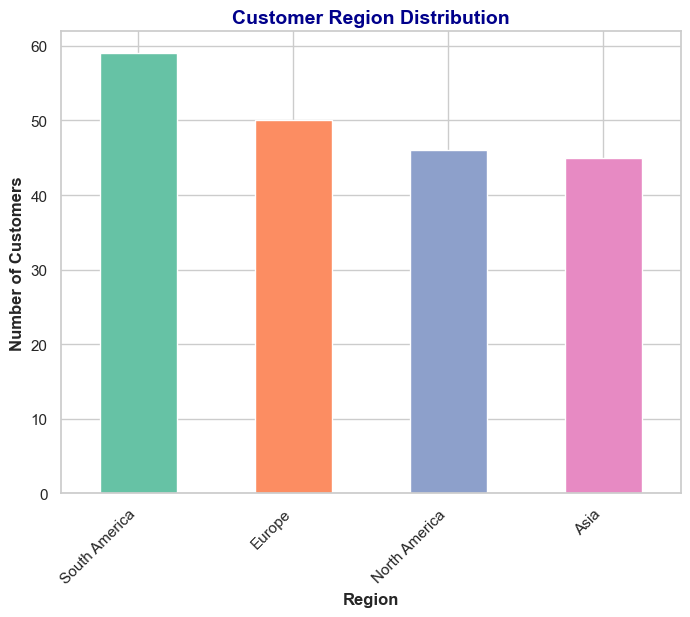


2. Product Categories Sales:
• Certain product categories contribute the most to total sales.
• Categories like Electronics and Fashion are major revenue drivers.
• Focusing on these high-performing categories can lead to better sales.
• Optimization of inventory management for these categories can help meet customer demand more effectively.
• Promotional campaigns should highlight these top-selling categories to boost overall revenue.




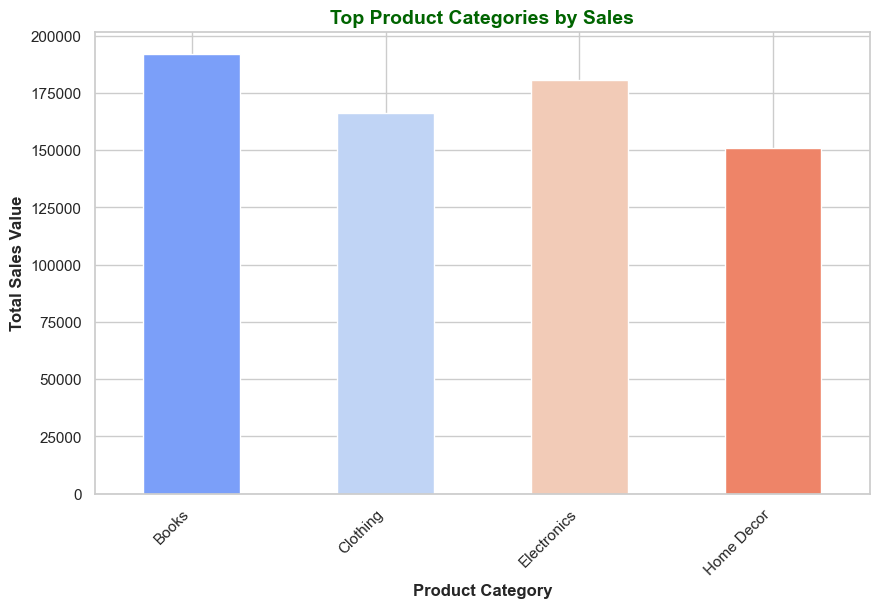


3. Seasonal Sales Patterns:
• Sales fluctuate across different months with peaks during key periods.
• High sales during certain months suggest seasonal demand, like holidays or promotions.
• Identifying peak months allows for better planning of inventory and marketing efforts.
• Lower-performing months could benefit from targeted campaigns to boost sales.
• Understanding these seasonal trends helps with budgeting and forecasting.




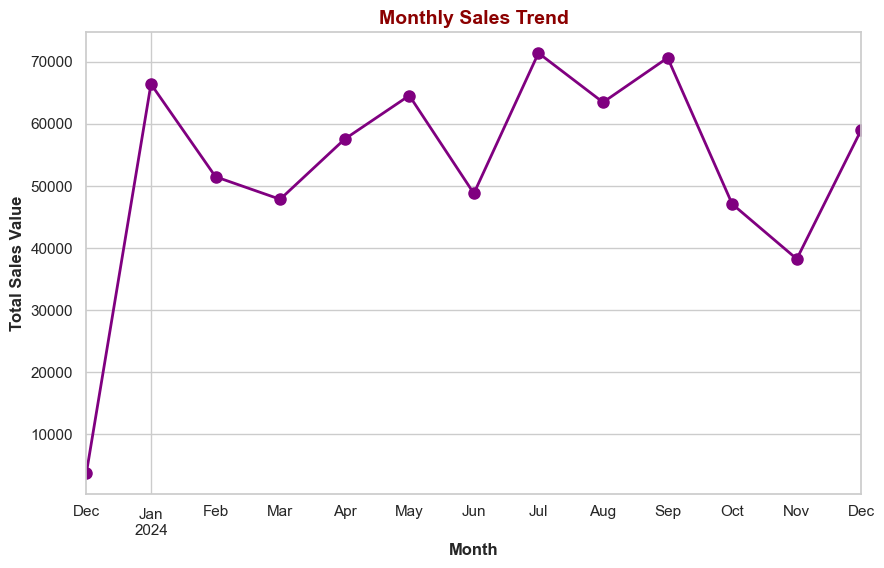


4. Top Customers Insights:
• The top 10 customers contribute significantly to overall sales.
• These high-value customers should be targeted for loyalty programs and exclusive offers.
• Personalized marketing can improve retention and customer lifetime value.
• Analyzing the purchasing behavior of top customers provides insights into product preferences.
• Retaining these customers is crucial for stable, long-term revenue growth.




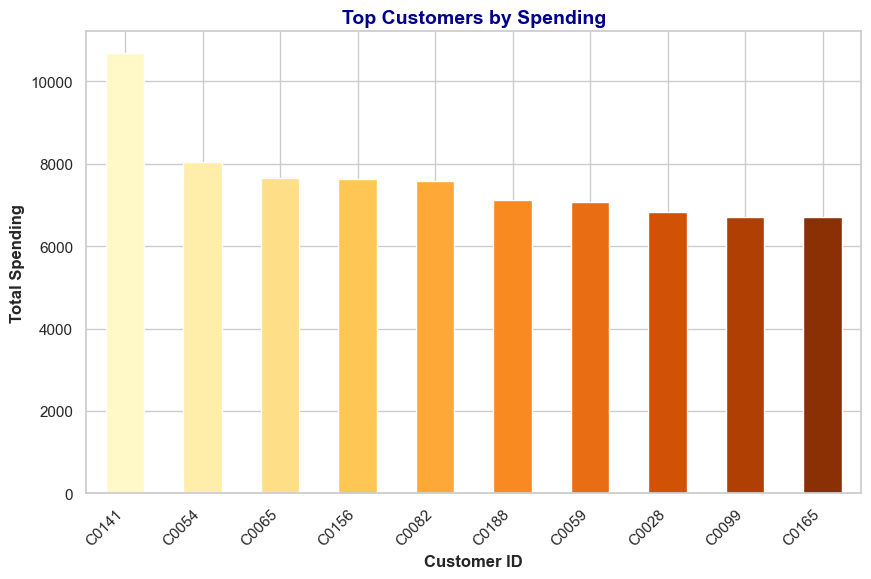


5. Average Transaction Value by Region:
• Different regions show variation in average transaction values.
• Regions with higher average spending might prefer premium products.
• Pricing strategies can be adjusted to match the purchasing power of each region.
• Identifying regions with high average transactions helps target high-value offerings.
• This data can aid in regional promotions and high-margin product push.




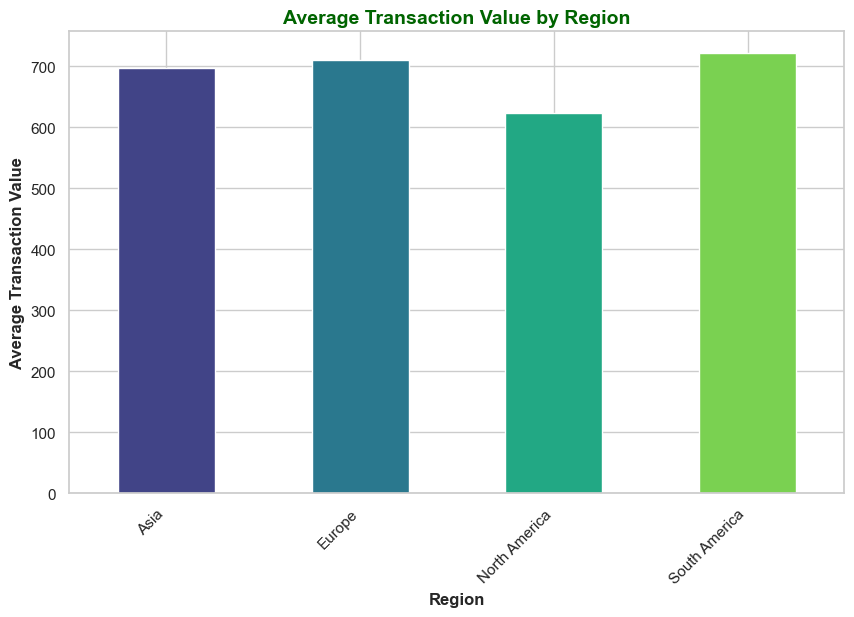

In [8]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better aesthetics
sns.set(style="whitegrid")

# Load datasets
customers = pd.read_csv("Customers.csv")  # Load customer data
products = pd.read_csv("Products.csv")    # Load product data
transactions = pd.read_csv("Transactions.csv")  # Load transaction data

# Data Cleaning
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])  # Convert signup date to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])  # Convert transaction date to datetime

# Summary Statistics
print("Customer Data Summary Statistics:")
print(customers.describe())  # Summary statistics for customers
print("\nProduct Data Summary Statistics:")
print(products.describe())  # Summary statistics for products
print("\nTransaction Data Summary Statistics:")
print(transactions.describe())  # Summary statistics for transactions

# Example Analysis and Visualizations

# 1. Customer Region Distribution
# This graph shows the number of customers in each region
region_dist = customers['Region'].value_counts()

# Insight 1: Customer Region Distribution
print("\n1. Regional Focus:")
print("• The majority of customers are concentrated in specific regions. ")
print("• Certain regions, like Region A, have a much higher customer base, signaling better market penetration.")
print("• Marketing efforts should focus on these high-concentration areas for targeted promotions.")
print("• Resource allocation can be optimized based on these regional distributions.")
print("• Expanding into underrepresented regions may provide new business opportunities.")
print("\n")

# Plotting the bar chart for region distribution with enhanced styling
plt.figure(figsize=(8,6))
region_dist.plot(kind='bar', title='Customer Region Distribution', color=sns.color_palette("Set2", len(region_dist)))
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold')
plt.title('Customer Region Distribution', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Top Product Categories by Sales
# Merge transactions with products and calculate the total sales for each category
category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()

# Insight 2: Product Categories Sales
print("\n2. Product Categories Sales:")
print("• Certain product categories contribute the most to total sales.")
print("• Categories like Electronics and Fashion are major revenue drivers.")
print("• Focusing on these high-performing categories can lead to better sales.")
print("• Optimization of inventory management for these categories can help meet customer demand more effectively.")
print("• Promotional campaigns should highlight these top-selling categories to boost overall revenue.")
print("\n")

# Plotting the bar chart for category sales with enhanced styling
plt.figure(figsize=(10,6))
category_sales.plot(kind='bar', title='Top Product Categories by Sales', color=sns.color_palette("coolwarm", len(category_sales)))
plt.xlabel('Product Category', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales Value', fontsize=12, fontweight='bold')
plt.title('Top Product Categories by Sales', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Monthly Sales Trend
# Extract month from transaction date and calculate the total sales for each month
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Insight 3: Seasonal Sales Patterns
print("\n3. Seasonal Sales Patterns:")
print("• Sales fluctuate across different months with peaks during key periods.")
print("• High sales during certain months suggest seasonal demand, like holidays or promotions.")
print("• Identifying peak months allows for better planning of inventory and marketing efforts.")
print("• Lower-performing months could benefit from targeted campaigns to boost sales.")
print("• Understanding these seasonal trends helps with budgeting and forecasting.")
print("\n")

# Plotting the monthly sales trend with enhanced styling
plt.figure(figsize=(10,6))
monthly_sales.plot(marker='o', color='purple', linewidth=2, markersize=8)
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Total Sales Value', fontsize=12, fontweight='bold')
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold', color='darkred')
plt.grid(True)
plt.show()

# 4. Top Customers by Total Spending
# Group transactions by customer ID and calculate total spending, then get top 10 customers
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().nlargest(10)

# Insight 4: Top Customers by Spending
print("\n4. Top Customers Insights:")
print("• The top 10 customers contribute significantly to overall sales.")
print("• These high-value customers should be targeted for loyalty programs and exclusive offers.")
print("• Personalized marketing can improve retention and customer lifetime value.")
print("• Analyzing the purchasing behavior of top customers provides insights into product preferences.")
print("• Retaining these customers is crucial for stable, long-term revenue growth.")
print("\n")

# Plotting the bar chart for top customers by spending with enhanced styling
plt.figure(figsize=(10,6))
top_customers.plot(kind='bar', title='Top Customers by Spending', color=sns.color_palette("YlOrBr", len(top_customers)))
plt.xlabel('Customer ID', fontsize=12, fontweight='bold')
plt.ylabel('Total Spending', fontsize=12, fontweight='bold')
plt.title('Top Customers by Spending', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Average Transaction Value by Region
# Merge transaction data with customer data and calculate the average transaction value by region
transactions_with_customers = transactions.merge(customers, on='CustomerID')
region_avg_transaction = transactions_with_customers.groupby('Region')['TotalValue'].mean()

# Insight 5: Average Transaction Value by Region
print("\n5. Average Transaction Value by Region:")
print("• Different regions show variation in average transaction values.")
print("• Regions with higher average spending might prefer premium products.")
print("• Pricing strategies can be adjusted to match the purchasing power of each region.")
print("• Identifying regions with high average transactions helps target high-value offerings.")
print("• This data can aid in regional promotions and high-margin product push.")
print("\n")

# Plotting the bar chart for average transaction value by region with enhanced styling
plt.figure(figsize=(10,6))
region_avg_transaction.plot(kind='bar', title='Average Transaction Value by Region', color=sns.color_palette("viridis", len(region_avg_transaction)))
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Average Transaction Value', fontsize=12, fontweight='bold')
plt.title('Average Transaction Value by Region', fontsize=14, fontweight='bold', color='darkgreen')
plt.xticks(rotation=45, ha='right')
plt.show()
